In [213]:
import numpy as np
import matplotlib.pyplot as plt 
import h5py 
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

In [214]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y , classes = load_dataset() 

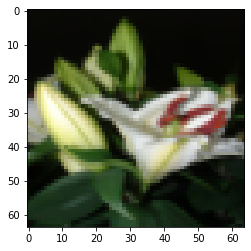

In [215]:
plt.imshow(train_set_x_orig[4])

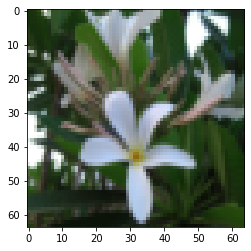

In [216]:
plt.imshow(train_set_x_orig[9])

y = [1], it's a 'cat' picture.


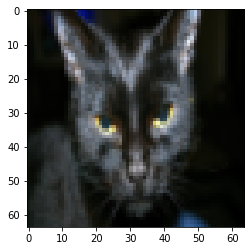

In [217]:
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") +  "' picture.")

In [227]:
m_train = train_set_x_orig.shape[0]

In [228]:
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
print(""+str(m_train))
print(""+str(m_test))
print(""+str(num_px))


209
50
64


In [229]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0] , -1).T

In [230]:
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0] , -1).T
print(""+str(test_set_x_flatten.shape))

(12288, 50)


In [231]:
print(""+str(train_set_x_flatten.shape))

(12288, 209)


In [232]:
#normalize 
test_set_x = test_set_x_flatten/255
train_set_x = train_set_x_flatten/255
print(""+str(test_set_x.shape))

(12288, 50)


In [234]:
def initialize_with_zeros(dim):

    w = np.zeros(shape=(dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance
    
    return w, b

SyntaxError: invalid syntax (<ipython-input-234-cd58b7c32fd7>, line 9)

In [235]:
dim=2

w,b = initialize_with_zeros(dim)

print("w : "+str(w))
print("b : "+str(b))

w : [[0.]
 [0.]]
b : 0


In [236]:
def sigmoid(z) : 
    
    
    s = 1/(1+np.exp(-z))
    
    
    return s

In [237]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))


sigmoid([0, 2]) = [0.5        0.88079708]


In [238]:
def propagation_forward_backward(w,b,X,Y) : 
    
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [239]:
#now we need to get our parameters dw ,db and cost 
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagation_forward_backward(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [240]:
#update w and b

def update (w,b,X,Y,num_iterations,learning_rate,print_cost = False): 
    
   
     
    costs = []
    
    for i in range(num_iterations):
        
        
        
        grads, cost = propagation_forward_backward(w, b, X, Y)

        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        
        #updating our parameters
        w = w - learning_rate * dw  
        b = b - learning_rate * db
       
        
        #memorize the values of cost
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs
    
    


In [241]:
params, grads, costs = update(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [270]:
def prediction(w,b,X) : 
    i = 0
    m = X.shape[1]
    w = w.reshape(X.shape[0], 1)
    Y_predictions = np.zeros((1, m))
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range (A.shape[1]) :
        if A[0,i] > 0.5 : 
            Y_predictions[0,i] = 1
        else :
            Y_predictions[0,i] = 0

        
    assert(Y_predictions.shape == (1, m))
        
    return Y_predictions


In [271]:
 A = sigmoid(np.dot(w.T,X)+b)
print(""+str(A.shape))

(1, 2)


In [299]:
Y_predictions = prediction(w,b,X)
print(""+str(Y_predictions))

[[1. 1.]]


In [300]:
#let's merge all of our function into a single one 

def training_model (train_set_x, train_set_y, test_set_x, test_set_y , num_iterations = 3000 ,learning_rate =0.5 , print_cost = False) : 
    
    w, b = initialize_with_zeros(train_set_x.shape[0])
    parameters , grads , costs = update (w,b,train_set_x,train_set_y,num_iterations,learning_rate,print_cost)
    
    w = parameters ["w"]
    b = parameters ["b"]
    dw = grads ["dw"]
    db = grads ["db"]
    
    
    Y_predictionTest = prediction(w,b,test_set_x)
    Y_predictionTrain = prediction(w,b,train_set_x)
    
    print("Train accuracy : {} %" .format(100 - np.mean(np.abs(Y_predictionTrain - train_set_y)) * 100 ))
    print("Test accuracy : {} % " .format(100 - np.mean(np.abs(Y_predictionTest - test_set_y)) * 100 ))
    
    
    allData = {"costs" : costs , "Y_predictionTeest" : Y_predictionTest , 
               "Y_predictionTrain" : Y_predictionTrain , "w" : w , "b" : b , 
               "learning_rate" : learning_rate,
               "num_iterations": num_iterations }
    
    
    
    return allData
    
    
    
    
    

In [301]:
allData = training_model (train_set_x , train_set_y , test_set_x , test_set_y , num_iterations = 2000 ,learning_rate =0.01 , print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.823921
Cost after iteration 200: 0.418944
Cost after iteration 300: 0.617350
Cost after iteration 400: 0.522116
Cost after iteration 500: 0.387709
Cost after iteration 600: 0.236254
Cost after iteration 700: 0.154222
Cost after iteration 800: 0.135328
Cost after iteration 900: 0.124971
Cost after iteration 1000: 0.116478
Cost after iteration 1100: 0.109193
Cost after iteration 1200: 0.102804
Cost after iteration 1300: 0.097130
Cost after iteration 1400: 0.092043
Cost after iteration 1500: 0.087453
Cost after iteration 1600: 0.083286
Cost after iteration 1700: 0.079487
Cost after iteration 1800: 0.076007
Cost after iteration 1900: 0.072809
Train accuracy : 99.52153110047847 %
Test accuracy : 70.0 % 


Text(0.5, 1.0, 'learning rate = 0.01')

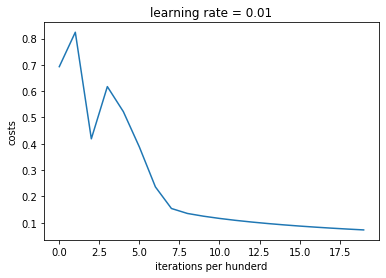

In [341]:
costs = np.squeeze(allData['costs'])
plt.plot(costs)
plt.ylabel('costs')
plt.xlabel('iterations per hunderd')
plt.title("learning rate = "+str(np.squeeze(allData["learning_rate"])))

C:\Users\Baha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
C:\Users\Baha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  import sys


y = 0.0, your algorithm predicts a "non-cat" picture.


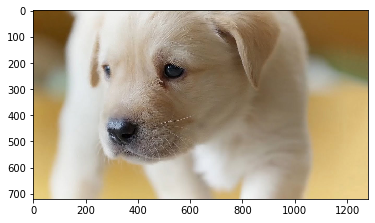

In [338]:
#TEST YOUR OWN PICTURE 

my_image = "dog1.jpg"   # change this to the name of your image file 


# We preprocess the image to fit the algorithm
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px, num_px)).reshape((1, num_px * num_px * 3)).T
my_predicted_image = prediction(allData["w"], allData["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")